In [ ]:
pip install neptune-client

     |████████████████████████████████| 92kB 3.3MB/s 
     |████████████████████████████████| 829kB 13.7MB/s 
     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 204kB 14.7MB/s 
     |████████████████████████████████| 163kB 17.0MB/s 
     |████████████████████████████████| 133kB 19.3MB/s 
     |████████████████████████████████| 143kB 21.7MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.4.119-py2.py3-none-any.whl size=150019 sha256=ee8c6136c49816355ae89c372cf8314677634e8f0fcd819bfd5f3eeaf478b9b7
  Stored in directory: /root/.cache/pip/wheels/84/5c/c1/a81e80761b94b4467fd3fda1fd3109463702f6247fc422eb33
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=6870fabbefeffee3f41d282b108347427ad18e437e0fa781173df6a1a50b2153
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9

In [ ]:
import pandas as pd
import numpy as np

from collections import Counter

from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
import neptune

API_TOKEN='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZDIzZmJlM2YtOWY5Yi00ZTdjLWJkMDktZGY5NjhjM2M1Yzc0In0=' #@param {type:"string"}
           eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiYmM4OTBkYTAtY2JlYi00MGM4LWIzZTUtYzg1MTJkMzJkYjk3In0=
PROJEKT_NAME = 'DataWorkshop-Foundation/Predicting-cancellation-of-visit' 

neptune.init(
    api_token=API_TOKEN,
    project_qualified_name=PROJEKT_NAME
)

Project(DataWorkshop-Foundation/Predicting-cancellation-of-visit)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cancellation/data/noshow_processed_data_v2.csv', index_col = 'Unnamed: 0')
dataset.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,BookHour,DaysToAppointment,AppointmentWeekDay,YearScheduledDay,MonthScheduledDay,DayScheduledDay,YearAppointmentDay,MonthAppointmentDay,DayAppointmentDay
0,29872499824296,0,62,0,0,1,0,0,0,0,0,19,0,4,2016,4,2016,2016,4,2016
1,558997776694438,1,56,0,0,0,0,0,0,0,0,16,0,4,2016,4,2016,2016,4,2016
2,4262962299951,0,62,1,0,0,0,0,0,0,0,16,0,4,2016,4,2016,2016,4,2016
3,867951213174,0,8,2,0,0,0,0,0,0,0,17,0,4,2016,4,2016,2016,4,2016
4,8841186448183,0,56,0,0,1,1,0,0,0,0,16,0,4,2016,4,2016,2016,4,2016


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   PatientId            110521 non-null  int64
 1   Gender               110521 non-null  int64
 2   Age                  110521 non-null  int64
 3   Neighbourhood        110521 non-null  int64
 4   Scholarship          110521 non-null  int64
 5   Hypertension         110521 non-null  int64
 6   Diabetes             110521 non-null  int64
 7   Alcoholism           110521 non-null  int64
 8   Handicap             110521 non-null  int64
 9   SMSReceived          110521 non-null  int64
 10  NoShow               110521 non-null  int64
 11  BookHour             110521 non-null  int64
 12  DaysToAppointment    110521 non-null  int64
 13  AppointmentWeekDay   110521 non-null  int64
 14  YearScheduledDay     110521 non-null  int64
 15  MonthScheduledDay    110521 non-null  int64
 16  Da

In [ ]:
y = dataset["NoShow"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: NoShow, dtype: int64

In [ ]:
X = dataset.loc[:, dataset.columns != 'NoShow']
X.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,BookHour,DaysToAppointment,AppointmentWeekDay,YearScheduledDay,MonthScheduledDay,DayScheduledDay,YearAppointmentDay,MonthAppointmentDay,DayAppointmentDay
0,29872499824296,0,62,0,0,1,0,0,0,0,19,0,4,2016,4,2016,2016,4,2016
1,558997776694438,1,56,0,0,0,0,0,0,0,16,0,4,2016,4,2016,2016,4,2016
2,4262962299951,0,62,1,0,0,0,0,0,0,16,0,4,2016,4,2016,2016,4,2016
3,867951213174,0,8,2,0,0,0,0,0,0,17,0,4,2016,4,2016,2016,4,2016
4,8841186448183,0,56,0,0,1,1,0,0,0,16,0,4,2016,4,2016,2016,4,2016


SMOTE&Tomek

In [ ]:
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[(0, 73707), (1, 73707)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


raw xgb

Accuracy: 78.90%
 f1  0.7928899540643098 
 recall 0.8135801625794111 
 precision 0.7732259949360514


NVMLError: Driver Not Loaded - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-2
Confusion matrix:
 [[11351  3493]
 [ 2729 11910]]


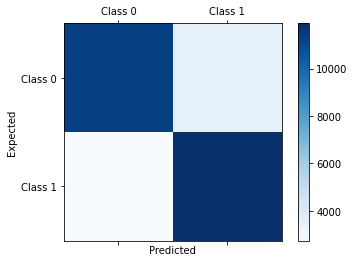

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(' f1 ', f1_score(y_test, y_pred), '\n',
    'recall', recall_score(y_test, y_pred), '\n',
    'precision', precision_score(y_test, y_pred) )

neptune.create_experiment(
    name='SMOTETomekXGB'
    # params={'learning_rate':0.1}
)

neptune.log_metric('accuracy', accuracy)
neptune.log_metric('f1', f1_score(y_test, y_pred))
neptune.log_metric('recall', recall_score(y_test, y_pred))
neptune.log_metric('precision', precision_score(y_test, y_pred))
neptune.append_tags(['finished_successfully'])

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

from matplotlib import pyplot as plt

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

neptune.log_image('Confusion_matrix', fig)

In [ ]:
neptune.stop()

Bibliography:

https://colab.research.google.com/github/neptune-ai/neptune-colab-examples/blob/master/neptune_test_run.ipynb#scrollTo=G6hnHaoZDl9u
